In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import numpy as np
from data_loader import inputs_poking, inputs_sawyer_data
from scipy.misc import imresize
pos_max = 23
neg_min = 46

def plot_msk(img, msk, score, axis):
    assert(np.max(img) < 0.51)
    assert(np.min(img) > -0.51)
    if np.sum(msk) != 0:
        msk_unique = np.unique(msk)
        assert(msk_unique[0] in [0,1])
        assert(msk_unique[1] in [0,1])
    image = ((img + 0.5)*255).astype(np.uint8)
    msk = imresize(msk, (160, 160))
    image[(msk>0).astype(np.bool),0]=255
    axis.imshow(image)
    axis.set_title(score)
    return 

In [ ]:
###read poking data###

# path = '/media/icm_data/poke_nlc_val_new'
path = '/media/icm_data/poke_nlc_training_new/'
file_names = list([path + '/' + l for l in os.listdir(path)])
pos_imgs, pos_masks, pos_scores = inputs_poking(file_names,pos_max, \
                                                    neg_min, batch_size = 40,positive=True, train=False)
neg_imgs, neg_masks, neg_scores = inputs_poking(file_names, pos_max, \
                                                    neg_min, batch_size = 40,positive=False, train=False)

##########plot imgs#########
coord = tf.train.Coordinator()
sess = tf.Session()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

pos_imgs_out, pos_masks_out, pos_scores_out, neg_imgs_out, neg_mask_out, neg_scores_out = \
        sess.run([pos_imgs, pos_masks, pos_scores, neg_imgs, neg_masks, neg_scores])
for pos_img, pos_mask, pos_scor, neg_img, neg_mask, neg_scor in zip(pos_imgs_out, \
                                pos_masks_out, pos_scores_out, neg_imgs_out, neg_mask_out, neg_scores_out):
    f, (ax1, ax2) = plt.subplots(1,2)
    plot_msk(pos_img, pos_mask, pos_scor, ax1)
    plot_msk(neg_img, neg_mask, neg_scor, ax2)
    plt.plot()
coord.request_stop()
sess.close()

['/media/icm_data/sawyer_data_new/model9_pos.tfrecord', '/media/icm_data/sawyer_data_new/model20_pos.tfrecord', '/media/icm_data/sawyer_data_new/model18_pos.tfrecord']
['/media/icm_data/sawyer_data_new/model6_neg.tfrecord', '/media/icm_data/sawyer_data_new/model26_neg.tfrecord', '/media/icm_data/sawyer_data_new/model43_neg.tfrecord']


/home/fred/anaconda3/envs/railrl/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


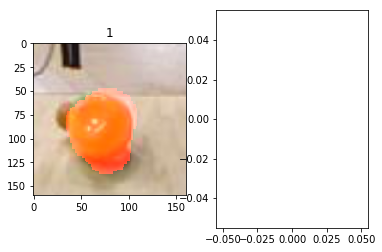

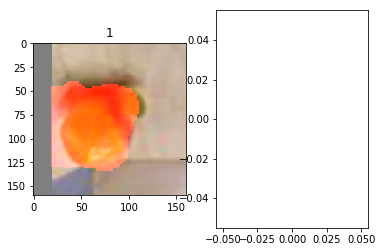

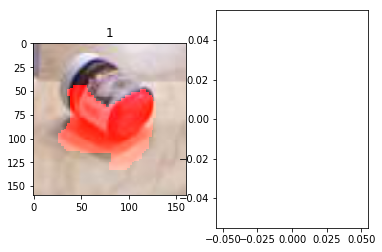

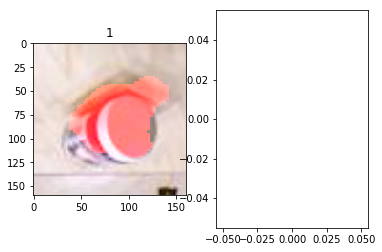

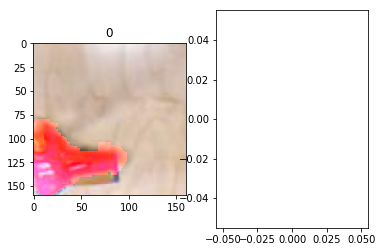

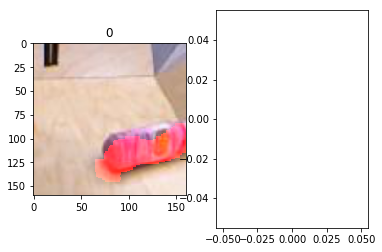

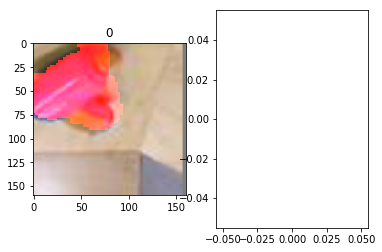

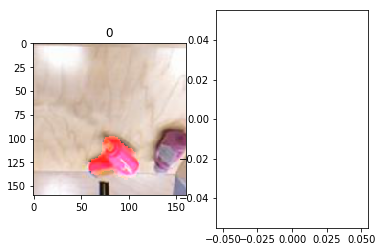

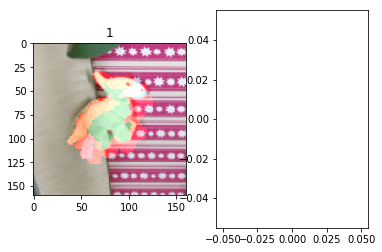

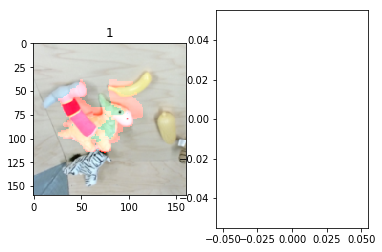

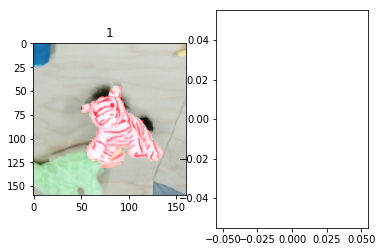

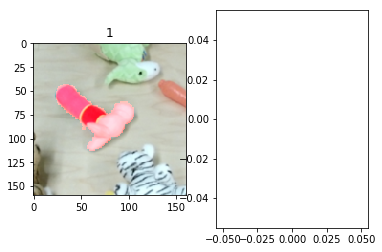

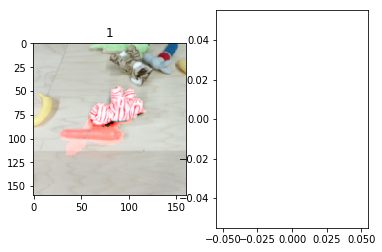

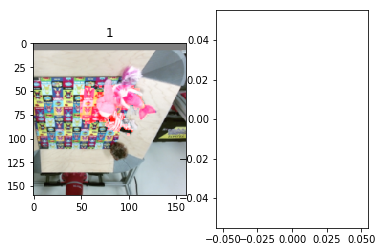

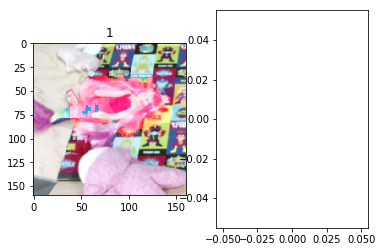

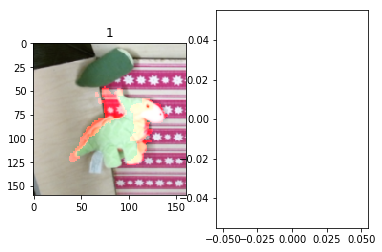

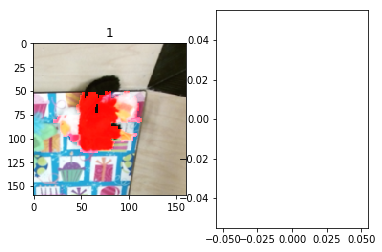

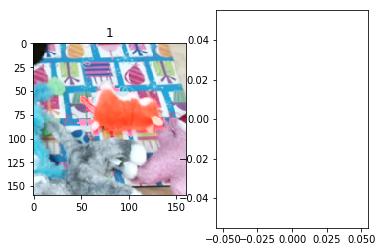

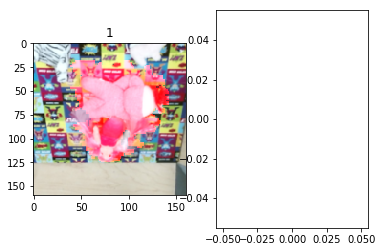

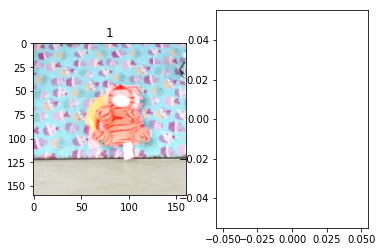

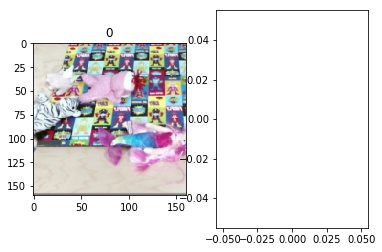

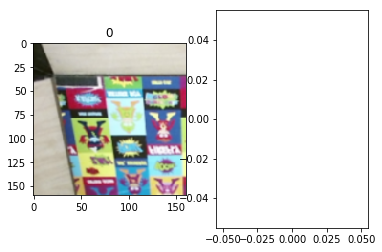

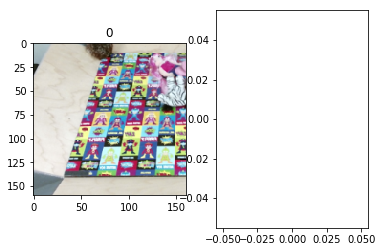

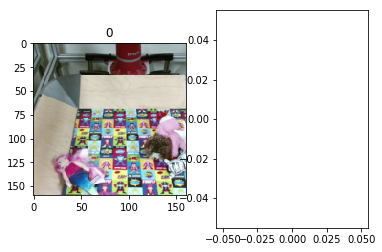

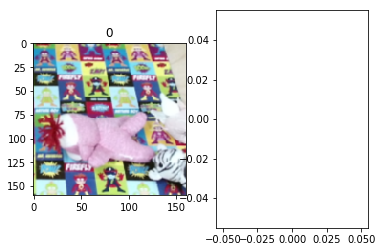

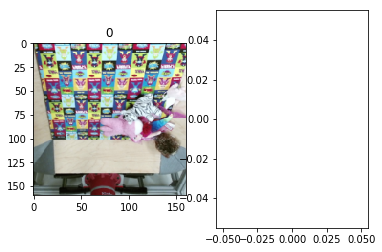

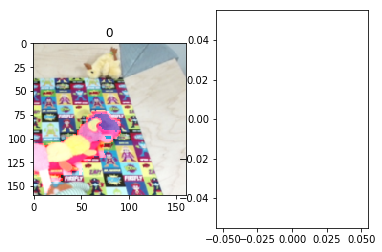

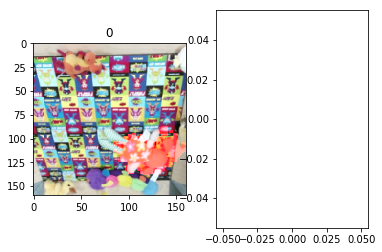

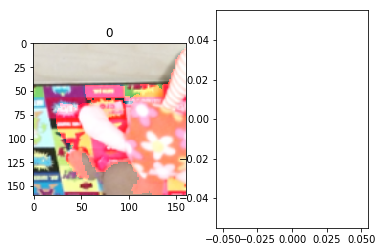

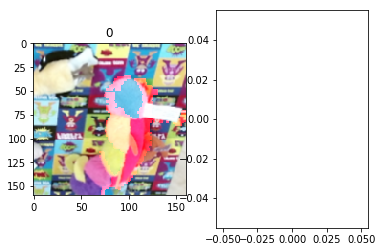

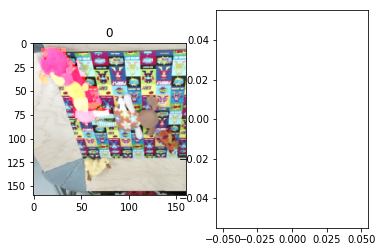

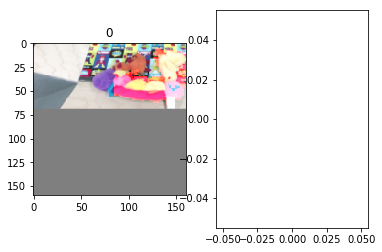

In [3]:
###########read sawyer and poking data###########
path_poking = '/media/icm_data/poke_nlc_training_new/'
train_set_names = list([path_poking + '/' + l for l in os.listdir(path_poking)])

path_sawyer = '/media/icm_data/sawyer_data_new'
train_set_new_names = list([path_sawyer + '/' + l for l in os.listdir(path_sawyer)])
train_set_new_pos_names = list(filter(lambda s: 'pos' in s, train_set_new_names))
train_set_new_neg_names = list(filter(lambda s: 'neg' in s, train_set_new_names))
print(train_set_new_pos_names[:3])
print(train_set_new_neg_names[:3])
train_pos_img_poking, train_pos_mask_poking, train_pos_score_poking = inputs_poking(train_set_names,\
                                    pos_max, neg_min, batch_size = 4, positive=True)
train_neg_img_poking, train_neg_mask_poking, train_neg_score_poking = \
                inputs_poking(train_set_names,\
                                    pos_max, neg_min,  batch_size = 4, positive=False)

train_pos_imgs_sawyer, train_pos_masks_sawyer, train_pos_scores_sawyer = \
                                inputs_sawyer_data(train_set_new_pos_names, "positive", pos_max,\
                                                                neg_min, batch_size = 12)
train_neg_imgs_sawyer, train_neg_masks_sawyer, train_neg_scores_sawyer = \
                                inputs_sawyer_data(train_set_new_neg_names, "negative", pos_max, \
                                                                neg_min,batch_size = 6)
train_neg_from_pos_imgs, train_neg_from_pos_masks, train_neg_from_pos_scores = \
                                inputs_sawyer_data(train_set_new_pos_names,"negative_from_positive", \
                                                                pos_max, neg_min, batch_size = 6)


train_img = tf.concat(0, [train_pos_img_poking,\
                            train_neg_img_poking, \
                            train_pos_imgs_sawyer, \
                            train_neg_imgs_sawyer, \
                            train_neg_from_pos_imgs])

train_mask = tf.concat(0, [train_pos_mask_poking, \
                            train_neg_mask_poking,\
                            train_pos_masks_sawyer,\
                            train_neg_masks_sawyer,\
                            train_neg_from_pos_masks])

train_score = tf.concat(0, [train_pos_score_poking, \
                            train_neg_score_poking, \
                            train_pos_scores_sawyer,\
                            train_neg_scores_sawyer,\
                            train_neg_from_pos_scores])
##########plot imgs#########
coord = tf.train.Coordinator()
sess = tf.Session()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

pos_imgs_out, pos_masks_out, pos_scores_out = \
        sess.run([train_img, train_mask, train_score])
for pos_img, pos_mask, pos_scor in zip(pos_imgs_out, \
                                pos_masks_out, pos_scores_out):
    f, (ax1, ax2) = plt.subplots(1,2)
    plot_msk(pos_img, pos_mask, pos_scor, ax1)
    plt.plot()
coord.request_stop()
sess.close()